<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_3/blob/main/Semana4_Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 1, Semanal - 4**

Equipo 3:
* Julio Osvaldo Hernandez Bucio - A01794366
* Juan Antonio Melendres Villa - A00369017

Ciencia y analítica de datos (Gpo 10) - Jobish Vallikavungal Devassia

08 de octubre de 2022

# **Obtención y limpieza de los datos**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from numpy import linalg as LA

Obtención de la base de datos

In [ ]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Creamos un DataFrame desde un csv y mostramos los datos

In [ ]:
df = pd.read_csv(input)
df.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Verificamos si existen datos vacios

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Vemos que filas y columnas tienen datos que son vacios de X6 a X23 que son las colummnas que tienen los datos relevantes.

In [ ]:
df1 = df[df.isnull().any(axis=1)]
df1.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
18,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
38,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,780.0,0.0,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0
64,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0
173,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0
219,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.0,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0


Se eliminan las filas que contienen demasiados valores nulos con los que no se puede concluir nada de utilidad.

In [ ]:
df = df.drop([df.index[18], df.index[38], df.index[6227], df.index[6232], df.index[24123], df.index[24365], df.index[29733], df.index[29734], df.index[29735], 
                     df.index[29824], df.index[29825], df.index[29832], 29833])
 
update_df = df[df.isnull().any(axis=1)]
update_df.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0
64,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0
173,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0
219,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.0,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0
239,0.0,0.0,0.0,0.0,0.0,0.0,19346.0,21708.0,22940.0,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0
240,1.0,2.0,2.0,-2.0,-2.0,-1.0,21501.0,20650.0,0.0,0.0,NaN,2285.0,0.0,0.0,0.0,0.0,2285.0,0.0


Se procede a convertir los valores negativos a positivos en las columnas de Historial de Pago Pasado SOBRE el SUBDATAFRAME que contiene valores NULOS

In [ ]:
for index, row in update_df.iterrows():
  for column in update_df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(not np.isnan(update_df[column][index]) and update_df[column][index] != 0 and update_df[column][index] != -1 and update_df[column][index] < 0):
      update_df.at[index, column] = update_df[column][index] * -1

Se procede a limpiar los valores de las columnas Importe del Pago Anterior para despues limpiar las columnas de Historial de pagos pasados SOBRE el SUBDATAFRAME que contiene valores NULOS.

Se tomo en cuenta el promedio para los pagos

In [ ]:
for index, row in update_df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in update_df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']]:
    if(np.isnan(update_df[column][index])):
      listColumnsNan.append(column)
  
  if(len(listColumnsNan) > 0):
    for column in update_df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']]:
      if(not np.isnan(update_df[column][index])):
        mean = mean + update_df[column][index]

  if(len(listColumnsNan) > 0):
    mean = mean / 6
    for column in listColumnsNan:
      update_df.at[index, column] = mean

Se procede a limpiar los valores de las columnas de Estado de Cuenta para despues limpiar las columnas de Historial de pagos pasados SOBRE el SUBDATAFRAME que contiene valores NULOS.

Para este caso se tomo la moda.

In [ ]:
def mode_lst(lst):
  y = {}
  for a in lst:
    if not a in y:
      y[a] = 1
    else:
      y[a] += 1
  return [g for g,l in y.items() if l == max(y.values())]

for index, row in update_df.iterrows():
  mode = 0
  listColumnsNan = []
  modeList = []
  for column in update_df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']]:
    if(np.isnan(update_df[column][index])):
      listColumnsNan.append(column) #If row has NAN values on bill statement column we get that column
  
  #If has nan we get the mode of this values so we can replace it
  if(len(listColumnsNan) > 0):
    for column in update_df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']]:
      if(not np.isnan(update_df[column][index])):
        modeList.append(update_df[column][index])
        

  if(len(listColumnsNan) > 0):
    mode = mode_lst(list(map(int, modeList)))[0]
    for column in listColumnsNan:
      update_df.at[index, column] = mode

Para limpiar los valores de las columnas de Historial de Pago Anterior se toma en cuenta la contraparte de las columnas de Pago Anterior.

In [ ]:
for index, row in update_df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in update_df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(np.isnan(update_df[column][index]) or update_df[column][index] == 0):
      listColumnsNan.append(column) #If row has NAN values on bill statement column we get that column
  
  #If has nan we get the mean of this values so we can replace it
  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      columnPayMent = 'X' + str((12 + int(column[1:])))#We get the corresping month on Preovius Payment columns
      if(update_df[columnPayMent][index] != 0): #if there's a payment it means pay duly
        update_df.at[index,column] = -1
      else:
        update_df.at[index,column] = 1

Se copian los valores limpios del SubDataFrame al DataFrame original

In [ ]:
for index, row in update_df.iterrows():
  for column in update_df.columns:
    df.at[index,column] = update_df[column][index]

Se verifica que no hayan filas con NAN

In [ ]:
df2 = df[df.isnull().any(axis=1)]
df2.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
182,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0
219,-1.0,-1.0,-1.0,-1.0,2.0,2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0
239,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19346.0,21708.0,22940.0,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0


Convertimos los valores negativos a positivos en las columnas de Historial de Pago Pasado sobre el DataFrame original

In [ ]:
for index, row in df.iterrows():
  for column in df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(not np.isnan(df[column][index]) and df[column][index] != 0 and df[column][index] != -1 and df[column][index] < 0):
      df.at[index, column] = df[column][index] * -1

Limpiamos los valores de las columnas de Historial de Pago Anterior se toma en cuenta la contraparte de las columnas de Pago Anterior.

In [ ]:
for index, row in df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(df[column][index] == 0):
      listColumnsNan.append(column) #If row has 0 on bill statement value column we get that column
  
  #If has 0 we get the replace zero with default
  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      columnPayMent = 'X' + str((12 + int(column[1:])))
      if(df[columnPayMent][index] != 0): #if there's a payment it means pay duly
        df.at[index,column] = -1
      else:
        df.at[index,column] = 1

DataFrame Limpio

In [ ]:
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,-1.0,-1.0,-1.0,-1.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,-1.0,-1.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,-1.0,1.0,2.0,-1.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,2.0,2.0,2.0,2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


Una vez que se tiene el DataFrame limpio procedemos a cambiar el nombre de las columnas para una mejor vizualizacion

In [ ]:
columns_name = ['ID', 'AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE', 
                'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6',
                'BILL STATEMENT 1', 'BILL STATEMENT 2', 'BILL STATEMENT 3', 'BILL STATEMENT 4', 'BILL STATEMENT 5', 'BILL STATEMENT 6',
                'AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3', 'AMOUNT PAY 4', 'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y']
df.columns = columns_name
df.columns

Index(['ID', 'AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS',
       'AGE', 'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3',
       'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6',
       'BILL STATEMENT 1', 'BILL STATEMENT 2', 'BILL STATEMENT 3',
       'BILL STATEMENT 4', 'BILL STATEMENT 5', 'BILL STATEMENT 6',
       'AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3', 'AMOUNT PAY 4',
       'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y'],
      dtype='object')

In [ ]:
df.head(5)

,ID,AMOUNT OF CREDIT,GENDER,EDUCATION,MARITAL STATUS,AGE,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,...,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# **Paso 1. Ejercicio**

# **Descripcion**

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores subyacentes (z<p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.


In [ ]:
df

,ID,AMOUNT OF CREDIT,GENDER,EDUCATION,MARITAL STATUS,AGE,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,...,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,-1.0,-1.0,-1.0,-1.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,-1.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
df.to_csv('data.csv')
df = pd.read_csv('/content/data.csv', index_col=0)
df.index.name = None
df.iloc[:10, 6:]

,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,PAST PAYMENT 5,PAST PAYMENT 6,BILL STATEMENT 1,BILL STATEMENT 2,BILL STATEMENT 3,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
0,2.0,2.0,-1.0,-1.0,2.0,2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,-1.0,2.0,-1.0,-1.0,1.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,-1.0,1.0,2.0,-1.0,-1.0,-1.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,2.0,2.0,2.0,2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [ ]:
df['AMOUNT PAY 1'].mean().round(2)

5663.76

In [ ]:
df['AMOUNT PAY 2'].mean().round(2)

5923.12

In [ ]:
df['AMOUNT PAY 3'].mean().round(2)

5226.22

# **Normalizacion**

In [ ]:
def normalize(x):
  min = np.min(x)
  max = np.max(x)
  range = max - min
  return [((a-min) / range).round(6) for a in x]

In [ ]:
df['PAST PAYMENT 1'] = normalize(df['PAST PAYMENT 1'])
df['PAST PAYMENT 2'] = normalize(df['PAST PAYMENT 2'])
df['PAST PAYMENT 3'] = normalize(df['PAST PAYMENT 3'])
df['PAST PAYMENT 4'] = normalize(df['PAST PAYMENT 4'])
df['PAST PAYMENT 5'] = normalize(df['PAST PAYMENT 5'])
df['PAST PAYMENT 6'] = normalize(df['PAST PAYMENT 6'])
df['BILL STATEMENT 1'] = normalize(df['BILL STATEMENT 1'])
df['BILL STATEMENT 2'] = normalize(df['BILL STATEMENT 2'])
df['BILL STATEMENT 3'] = normalize(df['BILL STATEMENT 3'])
df['BILL STATEMENT 4'] = normalize(df['BILL STATEMENT 4'])
df['BILL STATEMENT 5'] = normalize(df['BILL STATEMENT 5'])
df['BILL STATEMENT 6'] = normalize(df['BILL STATEMENT 6'])
df['AMOUNT PAY 1'] = normalize(df['AMOUNT PAY 1'])
df['AMOUNT PAY 2'] = normalize(df['AMOUNT PAY 2'])
df['AMOUNT PAY 3'] = normalize(df['AMOUNT PAY 3'])
df['AMOUNT PAY 4'] = normalize(df['AMOUNT PAY 4'])
df['AMOUNT PAY 5'] = normalize(df['AMOUNT PAY 5'])
df['AMOUNT PAY 6'] = normalize(df['AMOUNT PAY 6'])

Empezamos a trabajar en la muestra pequeña para comparar solo tres componentes

In [ ]:
df1 = df.head(20)

varX = df1['AMOUNT PAY 1']
varY = df1['AMOUNT PAY 2']
varZ = df1['AMOUNT PAY 3']

In [ ]:
X = varX.copy()
Y = varY.copy()
Z = varZ.copy()

normalizedValuesX = normalize(X)
normalizedValuesY = normalize(Y)
normalizedValuesZ = normalize(Z)

print(normalizedValuesX)
print(normalizedValuesY)
print(normalizedValuesZ)

[0.0, 0.0, 0.027604, 0.036372, 0.036372, 0.045457, 1.0, 0.006909, 0.06053, 0.0, 0.041931, 0.39669, 0.018186, 0.058179, 0.054542, 0.0, 0.058179, 0.188323, 0.0, 0.054542]
[0.017222, 0.025012, 0.037517, 0.050486, 0.917049, 0.045391, 1.0, 0.015032, 0.0, 0.0, 0.000295, 0.249147, 0.162491, 0.0, 0.074993, 0.037517, 0.0, 0.249989, 0.0, 0.038444]
[0.0, 0.013168, 0.013168, 0.015799, 0.13168, 0.008649, 0.500395, 0.0, 0.005687, 0.0, 0.000661, 0.113025, 0.085592, 0.039504, 0.039504, 0.01449, 0.019752, 1.0, 0.0, 0.013168]


In [ ]:
df1['AMOUNT PAY 1'] = normalizedValuesX
df1['AMOUNT PAY 2'] = normalizedValuesY
df1['AMOUNT PAY 3'] = normalizedValuesZ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df.iloc[:, 6:]

,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,PAST PAYMENT 5,PAST PAYMENT 6,BILL STATEMENT 1,BILL STATEMENT 2,BILL STATEMENT 3,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
0,0.333333,0.333333,0.000000,0.0,0.333333,0.333333,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.017222,0.000000,0.000000,0.000000,0.000000,1.0
1,0.000000,0.333333,0.000000,0.0,0.222222,0.333333,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.025012,0.013168,0.001610,0.000000,0.003783,1.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.027604,0.037517,0.013168,0.001610,0.002345,0.009458,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.036372,0.050486,0.015799,0.001771,0.002506,0.001892,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.036372,0.917049,0.131680,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.000000,0.000000,0.000000,0.0,0.222222,0.222222,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.555556,0.444444,0.333333,0.0,0.000000,0.000000,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.222222,0.000000,0.000000,0.0,0.000000,0.000000,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


In [ ]:
df1.loc[:, ['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']]

,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3
0,0.000000,0.017222,0.000000
1,0.000000,0.025012,0.013168
2,0.027604,0.037517,0.013168
3,0.036372,0.050486,0.015799
4,0.036372,0.917049,0.131680
5,0.045457,0.045391,0.008649
6,1.000000,1.000000,0.500395
7,0.006909,0.015032,0.000000
8,0.060530,0.000000,0.005687
9,0.000000,0.000000,0.000000


In [ ]:
ndf = df1[['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']]
ndf.corr()

,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3
AMOUNT PAY 1,1.000000,0.707230,0.515542
AMOUNT PAY 2,0.707230,1.000000,0.476249
AMOUNT PAY 3,0.515542,0.476249,1.000000


Podemos observar de otra manera la corralacion entre estas columnas

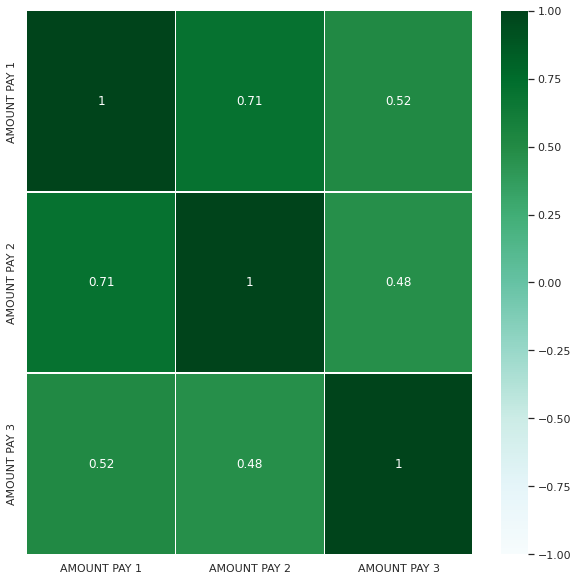

In [ ]:
corrs = ndf.corr()

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

In [ ]:
Variance = np.cov([df1['AMOUNT PAY 1'], df1['AMOUNT PAY 2'], df1['AMOUNT PAY 3']])
Variance

array([[0.05261621, 0.04679806, 0.02831884],
       [0.04679806, 0.0832176 , 0.03289983],
       [0.02831884, 0.03289983, 0.05734608]])

In [ ]:
ndf = df1[['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']]
ndf.var().sum()

0.19317989294319732

In [ ]:
t= ndf.var().sum()
varC =Variance[0][0]
varR = Variance[1][1]
varX = Variance[2][2]

In [ ]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Previous Payment Sep \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of Previous Payment Aug \t:', ((varR/t)*100).round(2),'%' )
print('Varience prop. of Previous Payment Jul \t:', ((varX/t)*100).round(2),'%' )

Total Varience 			: 0.19
Varience prop. of Previous Payment Sep 	: 27.24 %
Varience prop. of Previous Payment Aug 	: 43.08 %
Varience prop. of Previous Payment Jul 	: 29.69 %


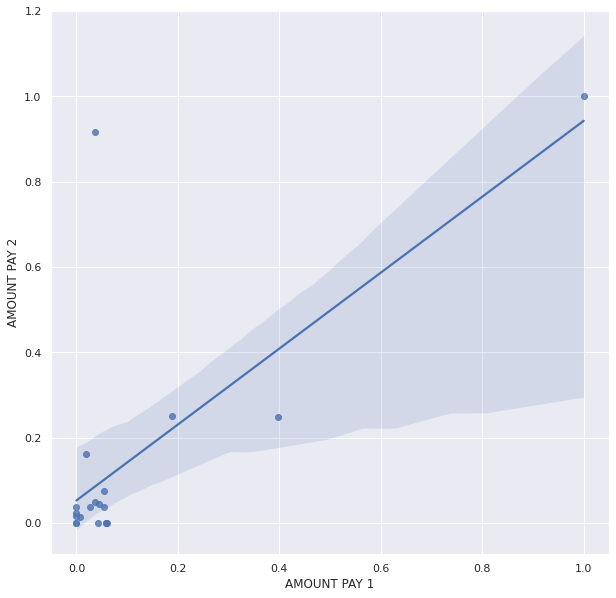

In [ ]:
p = sns.regplot(data = df1,
                x = df1['AMOUNT PAY 1'],
                y = df1['AMOUNT PAY 2'])
p

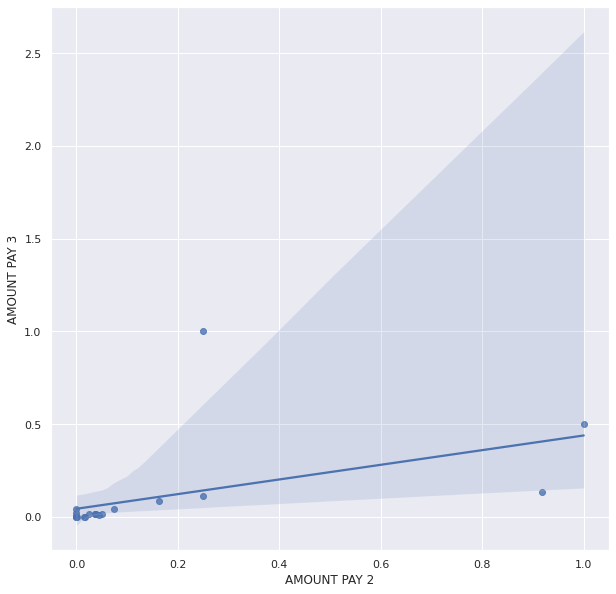

In [ ]:
p = sns.regplot(data = df1,
                x = df1['AMOUNT PAY 2'],
                y = df1['AMOUNT PAY 3'])
p

In [ ]:
pcs = PCA(n_components=3)

pcs.fit(df1[['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,0.373980,0.723993,0.723993
1,0.187821,0.182611,0.906604
2,0.134321,0.093396,1.000000


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2
Standard deviation,0.37,0.19,0.13
Proportion of variance,0.72,0.18,0.09
Cumulative proportion,0.72,0.91,1.00


In [ ]:
pcsSummary.columns = ['PC1', 'PC2', 'PC3']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2,PC3
Standard deviation,0.374,0.1878,0.1343
Proportion of variance,0.724,0.1826,0.0934
Cumulative proportion,0.724,0.9066,1.0000


# Scree plot

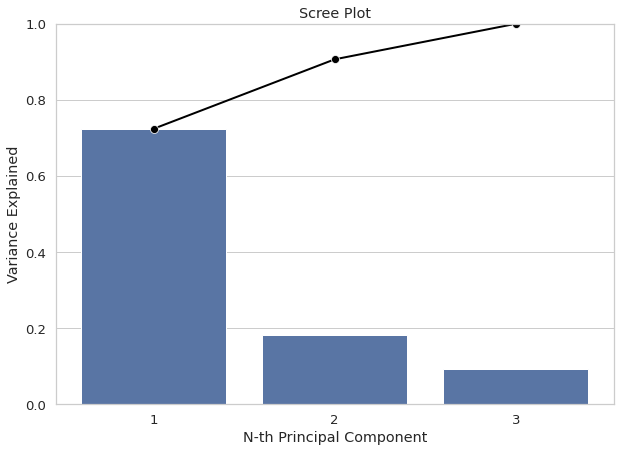

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.5309,  0.7086,  0.4647],
       [-0.1163, -0.4823,  0.8682],
       [-0.8394,  0.515 ,  0.1737]])

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3'],
                                index=['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']
                                )
pcsComponents_df

,PC1,PC2,PC3
AMOUNT PAY 1,0.530944,-0.116309,-0.839387
AMOUNT PAY 2,0.708597,-0.482307,0.515044
AMOUNT PAY 3,0.464746,0.868247,0.173662


In [ ]:
scores = pd.DataFrame(pcs.transform(df1[['AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3']]),
                      columns=['x', 'y', 'z']
                      )
scores.head()

,x,y,z
0,-0.193397,-0.013200,0.003625
1,-0.181758,-0.005524,0.009924
2,-0.158241,-0.014766,-0.006806
3,-0.143173,-0.019756,-0.007029
4,0.524726,-0.337092,0.459414


In [ ]:
x = (0.532112)*(0-5662.95) + (-0.0114581)*(1000-5922.49) + (-0.83885)*(1000 - 5225.56) 
y = (0.708311)*(0-5662.95) + (-0.482562)*(1000-5922.49) + (-0.515199)*(1000 - 5225.56) 
z = (0.463846)*(0-5662.95) + (0.868335)*(1000-5922.49) + (0.175618)*(1000 - 5225.56) 

In [ ]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y, '\n\t z = ', z)

For the PC1
 	 x =  587.6897382689999 
	 y =  541.2811283700003 
	 z =  -7643.191455929999


In [ ]:
scores.x.mean()

-1.1102230246251566e-17

In [ ]:
scores.y.sum()

7.632783294297951e-17

In [ ]:
scores.x.var() + scores.y.var()

0.17513770921516048

In [ ]:
df1['AMOUNT PAY 1'].var() + df1['AMOUNT PAY 2'].var() + df1['AMOUNT PAY 3'].var()

0.19317989294319732

In [ ]:
((scores.x.var()/
  (scores.x.var()+scores.y.var()+scores.z.var())
 )*100).round(0)

72.0

In [ ]:
pcs = PCA()
pcs.fit(df.iloc[:, 6:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Standard deviation,0.430546,0.291319,0.141615,0.127958,0.102278,0.082966,0.067467,0.060197,0.037807,0.033691,0.032050,0.024801,0.022433,0.019140,0.016060,0.012874,0.010696,0.008626,0.006906
Proportion of variance,0.548560,0.251144,0.059348,0.048453,0.030956,0.020370,0.013470,0.010723,0.004230,0.003359,0.003040,0.001820,0.001489,0.001084,0.000763,0.000491,0.000339,0.000220,0.000141
Cumulative proportion,0.548560,0.799704,0.859052,0.907505,0.938461,0.958831,0.972301,0.983024,0.987254,0.990613,0.993653,0.995473,0.996962,0.998046,0.998810,0.999300,0.999639,0.999859,1.000000


# **Scree Plot**

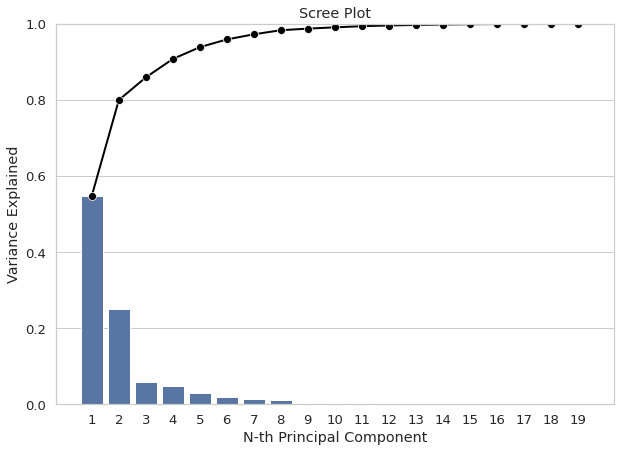

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
((pcsSummary_df.iloc[1][0])*100).round(0)

55.0

In [ ]:
((pcsSummary_df.iloc[2][1])*100).round(2)

79.97

# **Paso 1. Número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**

Acumulada se refiere a la proporción acumulada de la variabilidad de la muestra explicada por los componentes principales consecutivos. 

La proporción acumulada es utilizada para evaluar la cantidad total de varianza que explican los componentes principales consecutivos. La proporción acumulada puede ayudarle a determinar el número de componentes principales que se usará. Conserve los componentes principales que explican un nivel aceptable de varianza. El nivel aceptable depende de su aplicación.

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Standard deviation,0.4305,0.2913,0.1416,0.1280,0.1023,0.0830,0.0675,0.0602,0.0378,0.0337,0.0320,0.0248,0.0224,0.0191,0.0161,0.0129,0.0107,0.0086,0.0069
Proportion of variance,0.5486,0.2511,0.0593,0.0485,0.0310,0.0204,0.0135,0.0107,0.0042,0.0034,0.0030,0.0018,0.0015,0.0011,0.0008,0.0005,0.0003,0.0002,0.0001
Cumulative proportion,0.5486,0.7997,0.8591,0.9075,0.9385,0.9588,0.9723,0.9830,0.9873,0.9906,0.9937,0.9955,0.9970,0.9980,0.9988,0.9993,0.9996,0.9999,1.0000


Para este caso en particular donde se toman las columnas X6-X23, la proporción acumulada de la varianza explica que los primeros 5 componentes contienen mas del 93% de la varianza en los datos

# **Paso 2. Interpretacion de cada componente principal en términos de las variables originales**

Los componentes principales son las combinaciones lineales de las variables originales que explican la varianza en los datos. El número máximo de componentes extraídos siempre es igual al número de variables. Los vectores propios, compuestos por los coeficientes que corresponden a cada variable, se utilizan para calcular las puntuaciones de los componentes principales. Los coeficientes indican la ponderación relativa de cada variable en el componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
PAST PAYMENT 1,0.160420,0.301941,-0.466787,-0.113331,0.429149
PAST PAYMENT 2,0.159065,0.367572,-0.502712,-0.143896,0.175762
PAST PAYMENT 3,0.150327,0.400465,-0.201982,-0.034681,-0.547194
PAST PAYMENT 4,0.143206,0.411456,0.152202,0.120535,-0.499418
PAST PAYMENT 5,0.134258,0.402146,0.376116,0.219693,0.112653
PAST PAYMENT 6,0.124621,0.375997,0.443556,0.209440,0.471838
BILL STATEMENT 1,-0.012258,-0.059405,-0.152642,0.428352,-0.005305
BILL STATEMENT 2,-0.012077,-0.063260,-0.163278,0.452314,-0.006100
BILL STATEMENT 3,-0.006657,-0.034923,-0.093883,0.250880,0.000002
BILL STATEMENT 4,-0.009794,-0.054495,-0.155395,0.402460,0.001352


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
PAST PAYMENT 1,0.160420,0.301941,-0.466787,-0.113331,0.429149,-0.396172,-0.521668,-0.195422,-0.024942,0.008418,-0.010739,0.003836,-0.006450,0.006616,-0.000101,0.001149,0.000788,-0.001215,0.001713
PAST PAYMENT 2,0.159065,0.367572,-0.502712,-0.143896,0.175762,0.176195,0.630937,0.324787,0.012836,0.007150,0.004357,0.000074,0.015969,-0.009846,-0.006692,0.000040,-0.003554,0.000224,-0.003842
PAST PAYMENT 3,0.150327,0.400465,-0.201982,-0.034681,-0.547194,0.518915,-0.230924,-0.390687,-0.010875,0.003088,-0.002919,-0.007005,-0.003052,0.002788,0.012462,0.001528,0.000644,-0.000635,0.003632
PAST PAYMENT 4,0.143206,0.411456,0.152202,0.120535,-0.499418,-0.476782,-0.127122,0.528517,0.001395,0.002129,0.005986,0.000427,0.009850,0.008354,-0.005477,-0.001958,0.002425,0.003610,-0.003222
PAST PAYMENT 5,0.134258,0.402146,0.376116,0.219693,0.112653,-0.310166,0.434092,-0.576568,-0.007437,-0.019277,0.002061,0.015668,-0.003344,-0.004317,0.002611,-0.005188,-0.001153,-0.004603,0.001732
PAST PAYMENT 6,0.124621,0.375997,0.443556,0.209440,0.471838,0.466137,-0.266226,0.300354,0.035200,0.011188,-0.004244,-0.007770,-0.005330,-0.001315,-0.001456,0.002106,0.001156,0.002127,-0.000373
BILL STATEMENT 1,-0.012258,-0.059405,-0.152642,0.428352,-0.005305,0.015951,0.013201,0.010157,-0.182896,0.423773,-0.240327,0.235099,-0.102175,0.375678,0.151288,0.303989,-0.430085,-0.054965,-0.089697
BILL STATEMENT 2,-0.012077,-0.063260,-0.163278,0.452314,-0.006100,0.017598,0.001404,0.002516,-0.175414,0.326816,-0.167890,0.102760,0.228478,-0.241186,-0.302588,-0.165177,0.497067,0.108044,0.316163
BILL STATEMENT 3,-0.006657,-0.034923,-0.093883,0.250880,0.000002,0.003913,-0.002074,0.003140,-0.028163,0.038381,-0.013940,-0.108562,0.087101,-0.249700,0.471382,-0.151181,0.260612,-0.016417,-0.727684
BILL STATEMENT 4,-0.009794,-0.054495,-0.155395,0.402460,0.001352,0.011403,-0.003256,0.007660,0.012049,-0.222607,0.162240,-0.396410,0.101065,0.159453,0.104200,-0.543753,-0.313151,-0.284242,0.237547


**Analisis de la magnitud y la dirección de los coeficientes de las variables originales**

En estos resultados, el segundo componente principal tiene asociaciones positivas grandes con el el estado de pago de julio a abril(X6-X11), y los primeros meses para el estado de cuenta. Se puede interpretar este componente principalmente como una medición de la estabilidad financiera a largo plazo del cliente. El tercer componente tiene asociaciones positivas grandes con los estados de cuenta, así que este componente mide principalmente el balance financiero del cliente .

In [ ]:
pcsSummary_df.iloc[2,6]

0.9723008204802871

# **Paso 3. Valores atipicos**

**Error de reconstruccion**

La detección de anomalías (outliers) con Análisis de Componentes Principales (PCA) es una estrategia no supervisada para identificar anomalías cuando los datos no están etiquetados, es decir, no se conoce la clasificación real (anomalía - no anomalía) de las observaciones.

El método PCA crea una función que mapea la posición que ocupa cada observación en el espacio original con el que ocupa en el nuevo espacio generado. Este mapeo funciona en ambas direcciones, por lo que también se puede ir desde el nuevo espacio al espacio original. Solo aquellas observaciones que hayan sido bien proyectadas podrán volver a la posición que ocupaban en el espacio original con una precisión elevada.

Dado que la búsqueda de ese nuevo espacio ha sido guiada por la mayoría de las observaciones, serán las observaciones más próximas al promedio las que mejor puedan ser proyectadas y en consecuencia mejor reconstruidas. Las observaciones anómalas, por el contrario, serán mal proyectadas y su reconstrucción será peor. Es este error de reconstrucción (elevado al cuadrado) el que puede emplearse para identificar anomalías.

In [ ]:
def reconstruccion_pca(X, n_components, X_new=None):
    '''
    Función para calcular la reconstrucción y error de un conjunto de datos
    empleando un PCA
    
    Parameters
    ----------
    
    X (data.frame): datos de entrenamiento del PCA.
    
    X_new (data.frame): datos sobre los que aplicar la reconstrucción. Si es None,
                        se emplea X.
    
    id_components (list, numpy.narray): indice de las componentes empleadas para
                                        la reconstrucción, empezando por 0.
                                        Por defecto se emplean todas.
    
    Returns
    -------
    
    reconstruccion (data.frame): reconstrucción de los datos.
    
    error_reconstruccion (numpy.narray): error de reconstrucción de las observaciones.
    
    '''
    
    if X_new is None:
        X_new = X
    
    # Entrenamiento modelo PCA con escalado de los datos
    pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=n_components))
    pca_pipeline.fit(X=X)
    
    # Proyectar los datos
    proyecciones = pca_pipeline.transform(X_new)
    
    # Reconstrucción
    reconstruccion = pca_pipeline.inverse_transform(proyecciones)
    reconstruccion = pd.DataFrame(
                        reconstruccion,
                        columns = X_new.columns,
                        index   = X_new.index
                    )
    # Error cuadrático medio de reconstrucción
    error_reconstruccion = reconstruccion - X_new
    error_reconstruccion = error_reconstruccion**2
    error_reconstruccion = error_reconstruccion.mean(axis=1)
    
    print(f"Reconstrucción con un PCA de {n_components} componentes")
    
    return reconstruccion, error_reconstruccion

In [ ]:
# Reconstrucción con las 11 primeras componentes (90% de la varianza explicada)
# ==============================================================================
reconstruccion, error_reconstruccion = reconstruccion_pca(X=df.iloc[:, 6:].dropna(axis=0), n_components=19)

hello world
hello world 1
hello world 2
hello world 3
hello world 4
hello world 5
Reconstrucción con un PCA de 19 componentes


Una vez que el error de reconstrucción ha sido calculado, se puede emplear como criterio para identificar anomalías. Asumiendo que la reducción de dimensionalidad se ha realizado de forma que la mayoría de los datos (los normales) queden bien representados, aquellas observaciones con mayor error de reconstrucción deberían ser las más atípicas.

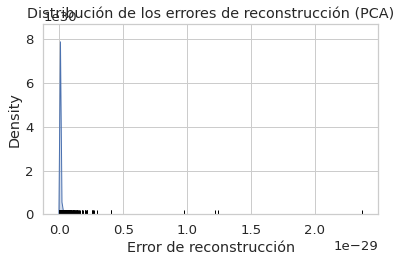

In [ ]:
# Distribución del error de reconstrucción
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
sns.kdeplot(
    error_reconstruccion,
    fill    = True,
    ax      = ax
)
sns.rugplot(error_reconstruccion,  ax=ax, color='black')
ax.set_title('Distribución de los errores de reconstrucción (PCA)')
ax.set_xlabel('Error de reconstrucción');

# **Fuentes**

Amat Rodrigo, J. (2017, junio). Análisis de Componentes Principales y t-SNE. Ciencia de Datos. https://www.cienciadedatos.net/documentos/35_principal_component_analysis

Minitab. (s.f). Interpretar todos los estadísticos y gráficas para Análisis de los componentes principales.  https://support.minitab.com/es-mx/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/


# **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

**1. ¿Cuál es el número de componentes mínimo y por qué?**

En este caso tomamos 5 componentes, la proporción acumulada de varianza explica que los primeros 5 componentes contienen más del 93% de la varianza de los datos.

**2. ¿Cuál es la variación de los datos que representan esos componentes?**

El 93% de varianza es explicada con 5 componentes.

**3. ¿Cuál es la pérdida de información después de realizar PCA?**

Cuando usa 11 componentes, la pérdida de datos es 100 - 90.8 = 9.16%.

**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

El mayor contribuidor de PC1, PAST PAYMENT 1 [0.160420], es el pago pasado en abril 2005

El mayor contribuidor de PC2, PAST PAYMENT 4 [0.411456], es el pago pasado en julio 2005

El mayor contribuidor de PC3, PAST PAYMENT 6 [0.443556], es el pago pasado en septiembre 2005

El mayor contribuidor de PC4, BILL STATEMENT 2 [0.452314], es el estado de factura en agosto 2005

El mayor contribuidor de PC5, PAST PAYMENT 6 [0.471838], es el pago pasado en septiembre 2005

------------------------------

El menor contribuidor de PC1, BILL STATEMENT 4 [-0.009794], es el estado de factura en octubre 2005

El menor contribuidor de PC2, BILL STATEMENT 2 [-0.063260], es el estado de factura en agosto 2005

El menor contribuidor de PC3, PAST PAYMENT 2 [-0.502712], es el pago pasado en mayo 2005

El menor contribuidor de PC4, PAST PAYMENT 2 [-0.143896], es el pago pasado en mayo 2005

El menor contribuidor de PC5, PAST PAYMENT 3 [-0.547194], es el pago pasado en junio 2005

**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

PCA (Análisis de Componentes Principales) es un método estadístico que se puede utilizar para simplificar la complejidad de los espacios muestrales multidimensionales mientras se preserva su información. Para que un modelo funcione bien, suele ser más útil que consigamos una predicción más precisa. En este caso, PCA aporta ventajas al Machine Learning al aplicar reducción de dimensionalidad, eliminar variables y perder una pequeña cantidad de información en el proceso, es importante usar PCA cuando sabemos que las variables originales están correlacionadas.